In [1]:
import bempp.api
import scipy.sparse.linalg as spla
import numpy as np
import datetime

In [2]:
class Timer(object):
    """A simple timer class"""
    
    def __init__(self):
        pass
    
    def start(self):
        """Starts the timer"""
        self.start = datetime.datetime.now()
        return self.start
    
    def stop(self, message="Total: "):
        """Stops the timer.  Returns the time elapsed"""
        self.stop = datetime.datetime.now()
        return message + str(self.stop - self.start)
    
    def now(self, message="Now: "):
        """Returns the current time with a message"""
        return message + ": " + str(datetime.datetime.now())
    
    def elapsed(self, message="Elapsed: "):
        """Time elapsed since start was called"""
        return message + str(datetime.datetime.now() - self.start)
    
    def split(self, message="Split started at: "):
        """Start a split timer"""
        self.split_start = datetime.datetime.now()
        return message + str(self.split_start)
    
    def unsplit(self, message="Unsplit: "):
        """Stops a split. Returns the time elapsed since split was called"""
        return message + str(datetime.datetime.now() - self.split_start)

In [30]:
k=5

def fun(x, n, domain_index, result):    
    result[0] =1j * k * np.exp(1j * k * x[0]) * (n[0]-1)

def smallest_eigenvalue(operator, iteration = False):
    '''Takes matrix and returns its smallest eigenvalue '''
    print("smallest1")
    
    #grid_fun = bempp.api.GridFunction(operator.domain, fun=fun)
    #grid_fun.plot()
    
    #discrete_operator=bempp.api.as_matrix(operator.weak_form())
    #discrete_operator=operator.weak_form()
    discrete_operator=operator
    print("smallest2")
    #discrete_operator=operator
    random_vector = np.random.rand(3,1)
    #random_vector = grid_fun.projections(operator.dual_to_range)
    difference = 1;
    norm_vector = 1;
    
    random_vector = random_vector/np.linalg.norm(random_vector) 
    #error 
    e = 0.0001;                    
    c = []
    koraci = [500]
    i = 0
    
    if(iteration):
        koraci = [10, 13, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120 ,150]
    print("smallest3")    
    while difference >= e:
        i += 1
        #x = np.linalg.solve(matrix, random_vector)
        x, info = spla.gmres(discrete_operator, random_vector)
        norm_vector = np.linalg.norm(x)

        if(norm_vector != 0):
            x = x/norm_vector
        else:
            return 0;

        difference = np.linalg.norm(np.abs(random_vector)-np.abs(x))
        #print(difference)
        random_vector = x
        old = x

    c.append(1/norm_vector)
    return c, i

def smallest_eigenvalue_inverse(operator, iteration = False):
    '''Takes matrix and returns its smallest eigenvalue '''
    #print(matrix)
    
    #grid_fun = bempp.api.GridFunction(operator.domain, fun=fun)
    #grid_fun.plot()
    
    discrete_operator=np.linalg.inv(bempp.api.as_matrix(operator.weak_form()))
    #discrete_operator=operator
    random_vector = np.random.rand(discrete_operator.shape[1],1)
    difference = 1;
    norm_vector = 1;
    res = 1;
    
    random_vector = random_vector/np.linalg.norm(random_vector)
    #error 
    e = 0.0001;                  
    c = []
    koraci = [500]
    i = 0
    
    if(iteration):
        koraci = [10, 13, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120 ,150]
        
    while difference >= e:
        i += 1
        #x = np.linalg.solve(matrix, random_vector)
        x = discrete_operator.dot(random_vector)
        norm_vector = np.linalg.norm(x)
        x /= norm_vector

        difference = np.linalg.norm(np.abs(random_vector)-np.abs(x)) 
        random_vector = x 

    c.append(1/norm_vector)
    return c, i

In [29]:
M=np.matrix([[3,2,1],[0,1,1],[0,1,2]]); #test matrica
M_rand=10*np.random.random((3,3));

grids = []
for i in range (3,8):
    print(i)
    grids.append(bempp.api.shapes.regular_sphere(i))

#grid = bempp.api.shapes.rectangle_with_hole(a=1, b=1, hole_radius=0.2, h=.05)

spaces = [];
for grid in grids:
    spaces.append(bempp.api.function_space(grid,"DP",0))

helmholtz = []   
for space in spaces:
    helmholtz.append(bempp.api.operators.boundary.helmholtz.double_layer(space,space,space,k))
    #print("Shape of the matrix: {0}".format(helmholtz[-1].weak_form().shape))
#laplace=bempp.api.operators.boundary.laplace.single_layer(space, space, space)
#helmholts_discrete_form=helmholtz.weak_form()
#laplace_discrete_form=laplace.weak_form()
space = bempp.api.function_space(grids[0],"DP",0)
helm = bempp.api.operators.potential.helmholtz.single_layer(space,space,space,k)

#laplace_discrete=laplace.weak_form()
#print("Shape of the matrix: {0}".format(laplace_discrete.shape))
#print("Shape of the matrix: {0}".format(helmholts_discrete_form.shape))
#print(helmholts_discrete_form)

#print(smallest_eigenvalue(laplace))



3
4
5
6
7


TypeError: unsupported operand type(s) for /: 'DiscontinuousPolynomialSpace' and 'complex'

In [21]:

for operator in helmholtz:
    t = Timer()
    '''t.start()
    list = np.linalg.eigvals(bempp.api.as_matrix(operator.weak_form()))
    print(t.stop())
    print(min(list))
    a = min (list)'''

    t = Timer()
    t.start()
    points1 = np.array(smallest_eigenvalue(operator))
    print(t.stop())
    print(points1)

    t = Timer()
    t.start()
    points2 = np.array(smallest_eigenvalue_inverse(operator))
    print(t.stop())
    print(points2)
#print(smallest_eigenvalue(M))

KeyboardInterrupt: 

In [28]:
list = np.linalg.eigvals(bempp.api.as_matrix(helmholtz[0].weak_form()))
print(smallest_eigenvalue_inverse(helmholtz[0]))

print(min(np.abs(list)))

([7.0243200695103565e-06], 435)
7.02432089226e-06


In [10]:
t = Timer()
t.start()
points2 = np.array(smallest_eigenvalue(helmholtz[3]))
print(t.stop())
print(points2)

MemoryError: 


a_15 = round(a.real, 15)
print(a_5)
print(a.real)
from matplotlib import pyplot as plt
koraci = [10, 13, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120 ,150]

plt.plot(koraci, points1 , 'r')
plt.plot(koraci, points2 , 'b')
plt.axis([0 , 50, 0 , 0.0000001])
plt.show()


In [216]:
k = 10
space=  bempp.api.function_space(grid,"DP",0)
piecewise_const_space = space

identity = bempp.api.operators.boundary.sparse.identity(
    piecewise_const_space, piecewise_const_space, piecewise_const_space)
adlp = bempp.api.operators.boundary.helmholtz.adjoint_double_layer(
    piecewise_const_space, piecewise_const_space, piecewise_const_space, k)
slp = bempp.api.operators.boundary.helmholtz.single_layer(
    piecewise_const_space, piecewise_const_space, piecewise_const_space, k)

lhs = 0.5*identity+adlp-1j*k*slp


In [228]:
points1 = np.array(smallest_eigenvalue(lhs, True))
print(points1)

[ 0.0002659   0.0002556   0.0002547   0.00025425  0.00025409  0.00025409
  0.00025408  0.00025405  0.00025403  0.00025403  0.00025403  0.00025403
  0.00025403  0.00025403  0.00025403]


In [222]:
list = np.linalg.eigvals(bempp.api.as_matrix(lhs.weak_form()))
print(min(list))

(0.000253343920855-1.8623092531e-05j)


In [226]:
points2 = np.array(smallest_eigenvalue_inverse(lhs, True))
print(points2)

[ 0.00026988  0.00026166  0.00025714  0.00025501  0.00025441  0.00025422
  0.00025412  0.00025405  0.00025403  0.00025403  0.00025403  0.00025403
  0.00025403  0.00025403  0.00025403]


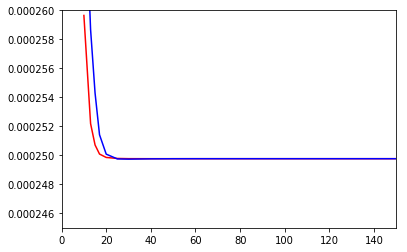

In [203]:
from matplotlib import pyplot as plt
koraci = [10, 13, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120 ,150]

plt.plot(koraci, points1 , 'r')
plt.plot(koraci, points2 , 'b')
plt.axis([0 , 150, 0.000245 , 0.00026])
plt.show()